In [1]:
import pandas as pd
rating_elec = pd.read_csv('ratings_Electronics.csv',
                          header=None, 
                          names=['user_id','item_id','rating','epoch_timestamp']
                         ).sample(500000)

In [39]:
rating_elec['date_of_review'] = rating_elec.epoch_timestamp.map(convertEpochTime)


In [40]:
import sklearn.cluster

In [45]:
X = rating_elec[['rating','epoch_timestamp']]

In [46]:
clusterer = sklearn.cluster.KMeans(n_clusters=2)
cluster_suggestions = clusterer.fit_predict(X)
cluster_suggestions

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
import sklearn.metrics
sklearn.metrics.silhouette_score(X, cluster_suggestions,sample_size=30000)

0.70645390870581959

In [28]:
scores = []
for i in range(2, 10):
    clustereri = sklearn.cluster.KMeans(n_clusters=i)
    cluster_suggestionsi = clustereri.fit_predict(X)
    scores.append(sklearn.metrics.silhouette_score(X, cluster_suggestionsi,sample_size=15000))
scores

[0.70240878678398933,
 0.64553015495608068,
 0.62015597122572552,
 0.57435688195114032,
 0.58588792245521504,
 0.58539283833005729,
 0.58460606578844942,
 0.55760632630508411]

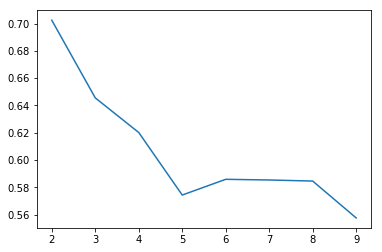

In [29]:
%matplotlib inline
import matplotlib
matplotlib.pyplot.plot(range(2,10), scores)

In [53]:
#adding a column for day of the week; Monday=0, Sunday=6
rating_elec['month_of_review'] = rating_elec.date_of_review.dt.month

In [54]:
x = rating_elec['rating']
y = rating_elec['month_of_review']

In [55]:
import numpy
colouring = numpy.array(['blue', 'green'])
colour_by_cluster = colouring[cluster_suggestions]
colour_by_cluster

array(['blue', 'blue', 'blue', ..., 'blue', 'blue', 'blue'], 
      dtype='|S5')

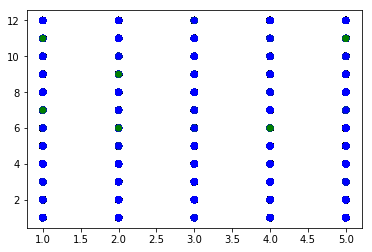

In [56]:
matplotlib.pyplot.scatter(x,y, color=colour_by_cluster)

## other link prediction models

In [57]:
# trying non-weighted graph first so taking the items which has good ratings (equivalent to bought and liked)
rating_elec_new = rating_elec[rating_elec.rating > 3]

In [84]:
rating_elec_new[['item_id','rating']].groupby(['item_id'])['rating'].count().sort_values(ascending=False)

item_id
B0074BW614    1026
B007WTAJTO     780
B0019EHU8G     734
B00DR0PDNE     719
B003ELYQGG     684
B006GWO5WK     614
B003ES5ZUU     607
B007R5YDYA     604
B00622AG6S     536
B000LRMS66     521
B0002L5R78     513
B003LR7ME6     463
B008OHNZI0     455
B009SYZ8OC     427
B00BGGDVOO     380
B002WE6D44     353
B009A5204K     346
B0098F5W0Q     343
B005HMKKH4     339
B00BGA9WK2     330
B002MAPRYU     309
B0012S4APK     303
B002V88HFE     299
B00316263Y     296
B0052YFYFK     292
B004QK7HI8     285
B0041Q38NU     269
B000S5Q9CA     264
B0044YU60M     264
B000BQ7GW8     258
              ... 
B00555R3HS       1
B00555R3JQ       1
B00555R3ZK       1
B00556DHXG       1
B00556I88K       1
B00556NCBI       1
B00556O4L0       1
B00556TKRI       1
B005578ULY       1
B00557AVSY       1
B00555R0XK       1
B00555QYB4       1
B00555369C       1
B00555QW70       1
B0055536CO       1
B005553BOC       1
B005553BS8       1
B005553CZK       1
B005553EPS       1
B005553GBA       1
B005553HUA       1
B005

In [67]:
rating_elec_new[rating_elec_new.item_id == 'B00KFAGCUM']

,user_id,item_id,rating,epoch_timestamp,date_of_review,month_of_review
7821501,AHNQX1408GB4E,B00KFAGCUM,5.0,1403049600,2014-06-18,6
7821557,A22T9W434DCQ0P,B00KFAGCUM,4.0,1405900800,2014-07-21,7
7821568,A2YJYBE8E07C6J,B00KFAGCUM,5.0,1405641600,2014-07-18,7
7821543,AWSGW35X1UY1I,B00KFAGCUM,5.0,1405987200,2014-07-22,7
7821544,A3AVJCB1ZD6ZY5,B00KFAGCUM,5.0,1403740800,2014-06-26,6
7821470,A24LRGIRBRTNDT,B00KFAGCUM,5.0,1405728000,2014-07-19,7
7821460,A1FHPAZPJNANJR,B00KFAGCUM,5.0,1405641600,2014-07-18,7


In [94]:
rating_elec_new[rating_elec_new.user_id == 'A3AVJCB1ZD6ZY5']

,user_id,item_id,rating,epoch_timestamp,date_of_review,month_of_review
5862360,A3AVJCB1ZD6ZY5,B007Q8GOGI,4.0,1345075200,2012-08-16,8
7821544,A3AVJCB1ZD6ZY5,B00KFAGCUM,5.0,1403740800,2014-06-26,6
933763,A3AVJCB1ZD6ZY5,B000FIQC5E,5.0,1221955200,2008-09-21,9


In [71]:
# resource allocation index
import networkx as nx
graph = nx.Graph()
nodes_already_added = set()
for index, row in rating_elec_new.iterrows():
    user = row['user_id']
    item = row['item_id']
    if user not in nodes_already_added:
        graph.add_node(user)
        nodes_already_added.add(user)
    if item not in nodes_already_added:
        graph.add_node(item)
        nodes_already_added.add(item)
    graph.add_edge(user, item)

In [72]:
#ra_index_soundarajan_hopcroft
import networkx as nx
graph_community = nx.Graph()
nodes_already_added = set()
for index, row in rating_elec_new.iterrows():
    user = row['user_id']
    item = row['item_id']
    if user not in nodes_already_added:
        graph_community.add_node(user)
        graph_community.node[user]['community'] = user
        nodes_already_added.add(user)
    if item not in nodes_already_added:
        graph_community.add_node(item)
        graph_community.node[item]['community'] = item
        nodes_already_added.add(item)
    graph_community.add_edge(user, item)

In [76]:
# to pass one item and get n no. of most similar items
def most_similar_items_soundarajan(item,cnt_items):
    similar_items = pd.DataFrame()
    for other_item in rating_elec_new.item_id.unique():
        if  item != other_item:
            rai = nx.ra_index_soundarajan_hopcroft(graph_community,[(item,other_item)])
            for u,v,p in rai:
                similar_items = similar_items.append({
                        'Soundarajan Coef.':p,
                        'item1':u,
                        'item2':v
                    },ignore_index=True)
    similar_items.sort_values('Soundarajan Coef.',ascending=False,inplace='True')
    return similar_items[0:cnt_items]

In [77]:
# to pass one item and get n no. of most similar items
def most_similar_items_rai(item,cnt_items):
    similar_items = pd.DataFrame()
    for other_item in rating_elec_new.item_id.unique():
        if  item != other_item:
            rai = nx.resource_allocation_index(graph,[(item,other_item)])
            for u,v,p in rai:
                similar_items = similar_items.append({
                        'RAI':p,
                        'item1':u,
                        'item2':v
                    },ignore_index=True)
    similar_items.sort_values('RAI',ascending=False,inplace='True')
    return similar_items[0:cnt_items]

In [78]:
print most_similar_items_soundarajan('B00KFAGCUM',3)
print most_similar_items_rai('B00KFAGCUM',3)

       Soundarajan Coef.       item1       item2
0                    0.0  B00KFAGCUM  B000CMS0XU
70948                0.0  B00KFAGCUM  B000MX3O76
70958                0.0  B00KFAGCUM  B001U1LX3Q
            RAI       item1       item2
26257  0.333333  B00KFAGCUM  B007Q8GOGI
14671  0.333333  B00KFAGCUM  B005H3Q59U
2712   0.333333  B00KFAGCUM  B00E3W15P0


In [95]:
print list(nx.ra_index_soundarajan_hopcroft(graph_community,[['B00KFAGCUM','B000FIQC5E']]))
print list(nx.resource_allocation_index(graph,[['B00KFAGCUM','B000FIQC5E']]))

[('B00KFAGCUM', 'B000FIQC5E', 0)]
[('B00KFAGCUM', 'B000FIQC5E', 0.3333333333333333)]


In [ ]:
similar_items = pd.DataFrame()
for item1 in rating_elec_new.item_id.unique():
    for item2 in rating_elec_new.item_id.unique():
        if item1 != item2 and len(list(nx.common_neighbors(graph_community,item1,item2))) > 0:
            coef = nx.ra_index_soundarajan_hopcroft(graph_community, [(item1, item2)])
            for u,v,p in coef:
                similar_items = similar_items.append({
                    'Soundarajan Coef.':p,
                    'Item1':u,
                    'Item2':v
                },ignore_index=True)
similar_items